# Week 3, Day 2: Linear Regression

## Learning Objectives
- Understand Linear Regression concepts
- Learn Simple and Multiple Linear Regression
- Master model evaluation techniques
- Practice implementing Linear Regression

## Topics Covered
1. Simple Linear Regression
2. Multiple Linear Regression
3. Model Evaluation
4. Assumptions and Diagnostics

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## 1. Simple Linear Regression

Coefficient (slope): 1.98
Intercept: 1.07
Mean Squared Error: 0.1634
R² Score: 0.9957


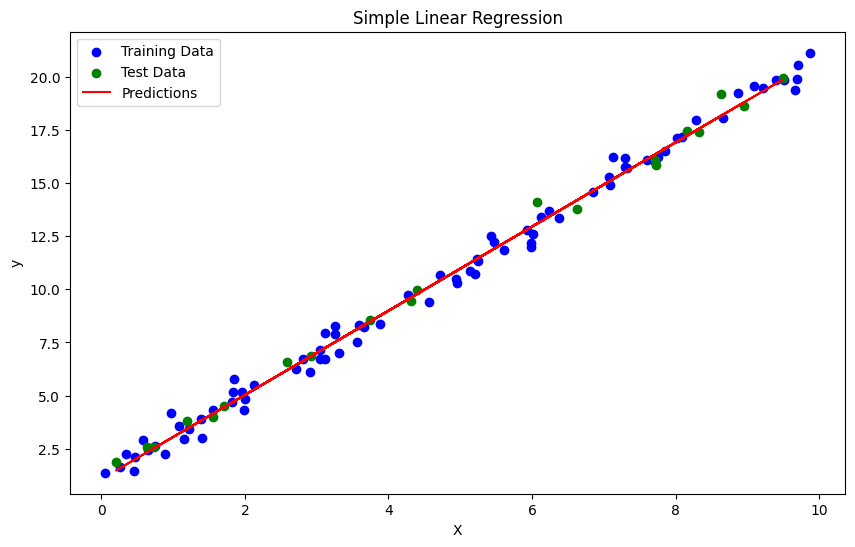

In [3]:
def simple_linear_regression():
    # Generate synthetic data
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = 2 * X + 1 + np.random.randn(100, 1) * 0.5

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print model parameters
    print(f"Coefficient (slope): {model.coef_[0][0]:.2f}")
    print(f"Intercept: {model.intercept_[0]:.2f}")

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(X_test, y_pred, color='red', label='Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Simple Linear Regression')
    plt.legend()
    plt.show()

simple_linear_regression()

## 2. Multiple Linear Regression

Model Coefficients:
Feature 1: 5.68
Feature 2: 9.33
Feature 3: -2.79
Intercept: 24.59

Mean Squared Error: 0.5043
R² Score: 0.9959


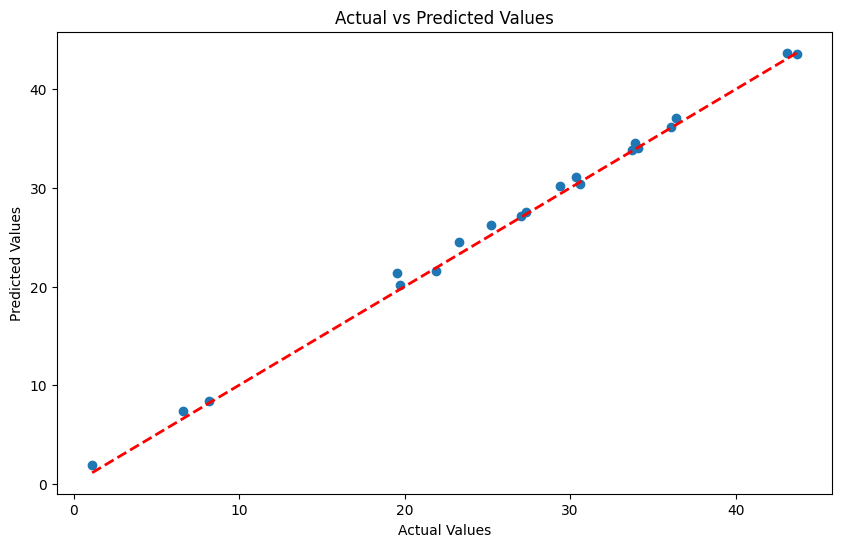

In [4]:
def multiple_linear_regression():
    # Generate synthetic data
    np.random.seed(42)
    n_samples = 100

    # Create features
    X = np.random.rand(n_samples, 3) * 10  # 3 features
    y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 5 + np.random.randn(n_samples) * 0.5

    # Create DataFrame
    df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
    df['Target'] = y

    # Split data
    X = df[['Feature 1', 'Feature 2', 'Feature 3']]
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Print coefficients and metrics
    print("Model Coefficients:")
    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: {coef:.2f}")
    print(f"Intercept: {model.intercept_:.2f}")

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nMean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Visualize actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

multiple_linear_regression()

## 3. Model Evaluation and Diagnostics

In [ ]:
def model_diagnostics():
    # Generate data
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = 2 * X + 1 + np.random.randn(100, 1) * 0.5

    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate residuals
    residuals = y - y_pred

    # Create diagnostic plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Residuals vs Fitted
    axes[0, 0].scatter(y_pred, residuals)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted')

    # Q-Q plot
    from scipy import stats
    stats.probplot(residuals.ravel(), dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Normal Q-Q')

    # Scale-Location
    standardized_residuals = np.sqrt(np.abs(stats.zscore(residuals)))
    axes[1, 0].scatter(y_pred, standardized_residuals)
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('√|Standardized residuals|')
    axes[1, 0].set_title('Scale-Location')

    # Residuals histogram
    axes[1, 1].hist(residuals, bins=20)
    axes[1, 1].set_xlabel('Residuals')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Residuals Distribution')

    plt.tight_layout()
    plt.show()

model_diagnostics()

## Practical Exercises

In [ ]:
# Exercise 1: House Price Prediction

def house_price_prediction():
    # Generate synthetic house price data
    np.random.seed(42)
    n_samples = 200

    # Features: size, bedrooms, age
    size = np.random.normal(2000, 500, n_samples)
    bedrooms = np.random.randint(1, 6, n_samples)
    age = np.random.randint(0, 50, n_samples)

    # Generate prices
    prices = 100000 + 100 * size + 20000 * bedrooms - 1000 * age + np.random.normal(0, 50000, n_samples)

    # Create DataFrame
    data = pd.DataFrame({
        'Size': size,
        'Bedrooms': bedrooms,
        'Age': age,
        'Price': prices
    })

    print("Sample of house data:")
    print(data.head())

    # Task: Build a linear regression model to predict house prices
    # 1. Prepare the data (split features and target)
    # 2. Split into training and test sets
    # 3. Scale the features
    # 4. Train the model
    # 5. Evaluate performance

    # Your code here

house_price_prediction()

Sample of house data:
          Size  Bedrooms  Age          Price
0  2248.357077         2   24  340753.909318
1  1930.867849         2   20  291785.168013
2  2323.844269         1   35  381157.589338
3  2761.514928         1   22  369573.189788
4  1882.923313         1   15  340145.957280


In [ ]:
# Exercise 2: Model Comparison

def compare_models():
    # Generate nonlinear data
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = X**2 + np.random.randn(100, 1) * 10

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Task: Compare linear regression with polynomial regression
    # 1. Fit a linear regression model
    # 2. Create polynomial features and fit another model
    # 3. Compare their performance
    # 4. Visualize the results

    # Your code here

compare_models()

## MCQ Quiz

1. What is the main assumption of linear regression?
   - a) Data must be normally distributed
   - b) Linear relationship between features and target
   - c) Features must be independent
   - d) Target must be categorical

2. What does R² measure?
   - a) Error rate
   - b) Prediction accuracy
   - c) Proportion of variance explained
   - d) Model complexity

3. Which is NOT an assumption of linear regression?
   - a) Linearity
   - b) Independence
   - c) Normality of residuals
   - d) Categorical target variable

4. What is multicollinearity?
   - a) Multiple target variables
   - b) High correlation between features
   - c) Nonlinear relationships
   - d) Missing values

5. Which metric measures the average squared difference between predicted and actual values?
   - a) R²
   - b) MSE
   - c) MAE
   - d) RMSE

6. What is the purpose of feature scaling in linear regression?
   - a) Reduce overfitting
   - b) Make features comparable
   - c) Increase accuracy
   - d) Remove outliers

7. What does the coefficient in simple linear regression represent?
   - a) Y-intercept
   - b) Slope
   - c) Error term
   - d) Correlation

8. Which plot is useful for checking normality of residuals?
   - a) Scatter plot
   - b) Line plot
   - c) Q-Q plot
   - d) Bar plot

9. What is heteroscedasticity?
   - a) Non-linear relationships
   - b) Unequal variance of residuals
   - c) Missing values
   - d) Outliers

10. Which method is used to fit a linear regression model?
    - a) Maximum likelihood
    - b) Ordinary least squares
    - c) Gradient descent
    - d) All of the above

Answers: 1-b, 2-c, 3-d, 4-b, 5-b, 6-b, 7-b, 8-c, 9-b, 10-d